<a href="https://www.kaggle.com/code/lakshmi116/kriti?scriptVersionId=119613988" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/last-10-years-stock-market-data/1_train.csv
/kaggle/input/last-10-years-stock-market-data/4_train.csv
/kaggle/input/last-10-years-stock-market-data/3_train.csv
/kaggle/input/last-10-years-stock-market-data/test.csv
/kaggle/input/last-10-years-stock-market-data/2_train.csv


In [2]:
# Load Train and Test data
train_size = 4
train_data = []
for i in range(train_size):
    train_data.append(pd.read_csv("/kaggle/input/last-10-years-stock-market-data/{}_train.csv".format(i+1)))
    
test_data = pd.read_csv("/kaggle/input/last-10-years-stock-market-data/test.csv")


In [3]:
# Print relavent meta data for display

def print_info(train_data, label):
    print("Train Data {} HEAD TAIL".format(label))
    print(train_data.head())
    print(train_data.tail())
    print(train_data.columns)
    print(train_data.shape)
    print()

for i in range(train_size):
    print_info(train_data[i], i+1)

Train Data 1 HEAD TAIL
         Date  Open  High   Low  Close  Adj Close        Volume
0  2010-06-29  9.50  9.47  9.23   9.12       7.93  1.133345e+09
1  2010-06-30  9.25  9.22  9.00   9.04       7.52  7.394520e+08
2  2010-07-01  9.01  9.02  8.63   8.70       7.45  1.022896e+09
3  2010-07-02  8.98  8.96  8.74   8.94       7.68  6.938428e+08
4  2010-07-06  9.13  9.13  8.61   8.85       7.68  6.152356e+08
            Date   Open   High    Low  Close  Adj Close       Volume
2526  2020-07-13  97.41  99.85  95.33  95.53      93.98  191649200.0
2527  2020-07-14  94.81  97.15  93.66  97.02      95.63  170989200.0
2528  2020-07-15  99.06  99.18  96.41  97.58      96.28  153198000.0
2529  2020-07-16  96.49  97.55  95.94  96.67      95.18  110577600.0
2530  2020-07-17  97.01  97.15  95.86  96.17      94.73   92186800.0
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
(2531, 7)

Train Data 2 HEAD TAIL
         Date  Open  High   Low  Close  Adj Close       Vo

In [4]:
df = [k.copy() for k in train_data]

import datetime

def str_to_datetime(date, fmt=210):
    ld = date.split('-')
    year, month, day = int(ld[0]), int(ld[1]), int(ld[2])
    
    if(fmt==12):
        year, day = day, year

    return datetime.datetime(year=year, month=month, day=day)

for i in range(len(df)):
    if(i<3):
        df[i]['Date'] = df[i]['Date'].apply(str_to_datetime)
    else:
        df[i]['Date'] = df[i]['Date'].apply(str_to_datetime, fmt=12)

    df[i].index = df[i].pop('Date')

In [5]:
# for idx,row in df.iterrows():
#     print(idx, row['Date'], row['Open'], row['Low'], row['High'], row['Close'])

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

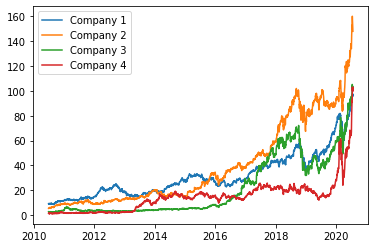

In [6]:
import matplotlib.pyplot as plt

for i in range(len(df)):
    plt.plot(df[i].index, df[i]['Close'])
plt.legend(["Company {}".format(i+1) for i in range(len(df))])

df[0].columns

In [7]:
df[0].loc[:str_to_datetime('2010-07-17')].tail(13).to_numpy().shape

(13, 6)

In [8]:
import numpy as np
 
def df_to_data(dataframe, first_date_str, last_date_str, n):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset.to_numpy()
        x, y = values[:-1][:], values[-1][3]#close's index

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True
    X = np.array([np.array([np.array(xii) for xii in xi]) for xi in X])
    Y = np.array(Y)
    print("x-shape", X.shape, type(X), type(Y), Y.shape)
    return dates, X.astype(np.float32), Y.astype(np.float32)

# def windowed_df_to_date_X_y(windowed_df):
#     df_as_np = windowed_df.to_numpy()
    
#     dates = df_as_np[:,0]
#     middle = df_as_np[:,1:-1]
#     y  = df_as_np[:,-1]
    
#     X = middle.reshape((len(dates), middle.shape[1], 1)) # 3rd parameter is the vector dimnesion
#     #change 1 to more if other variables apart from close are used
    
#     return dates, X.astype(np.float32), y.astype(np.float32)

# # dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates = []
X = []
Y = []
for i in range(len(df)):
    dates_obj, X_obj, Y_obj = df_to_data(df[i], '2010-07-17', '2020-07-17', n=12)
    dates.append(dates_obj)
    X.append(X_obj)
    Y.append(Y_obj)

print(X[0].shape, len(X))
print(Y[0].shape, len(Y))
print(dates[0][0], len(dates))

x-shape (2518, 12, 6) <class 'numpy.ndarray'> <class 'numpy.ndarray'> (2518,)
x-shape (2518, 12, 6) <class 'numpy.ndarray'> <class 'numpy.ndarray'> (2518,)
x-shape (2518, 12, 6) <class 'numpy.ndarray'> <class 'numpy.ndarray'> (2518,)
x-shape (2518, 12, 6) <class 'numpy.ndarray'> <class 'numpy.ndarray'> (2518,)
(2518, 12, 6) 4
(2518,) 4
2010-07-17 00:00:00 4


In [9]:
# day1: [open1, close1 ...]
# day2: open2, close2 ...
# .
# .
# day2518: open2518, close...
    
# entry1: day-1[open, close, high, low, adj close, volume] day-2 day-3 day-4 .. day-12
# entry2
# .
# .
# entry2506

2014 4
(2014, 12, 6) 4
2014 4
504 4
(504, 12, 6) 4
504 4


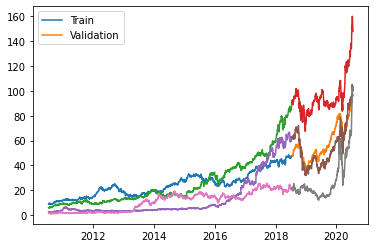

In [10]:
q_80 = int(len(dates[0])*0.8)
q_90 = int(len(dates[0])*0.9)

dates_train = [dates[i][:q_80] for i in range(len(dates))]
X_train = [X[i][:q_80][:][:] for i in range(len(X))]
y_train = [Y[i][:q_80] for i in range(len(Y))]

dates_val = [dates[i][q_80:] for i in range(len(dates))]
X_val = [X[i][q_80:][:][:] for i in range(len(X))]
y_val = [Y[i][q_80:] for i in range(len(Y))]


for i in range(len(df)):
    plt.plot(dates_train[i], y_train[i])
    plt.plot(dates_val[i], y_val[i])

plt.legend(['Train', 'Validation'])

print(len(dates_train[0]), len(dates_train))
print(X_train[0].shape, len(X_train))
print(len(y_train[0]), len(y_train))

print(len(dates_val[-1]), len(dates_val))
print(X_val[-1].shape, len(X_val))
print(len(y_val[-1]), len(y_val))


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Change 64 to optimize for testing accuracy

# model = Sequential([layers.Input((12,6)), 
#                     layers.LSTM(128), 
#                     layers.Dense(64, activation='relu'), 
#                     layers.Dense(32, activation='relu'), 
#                     layers.Dense(32, activation='relu'),
#                     layers.Dense(1)])

model = []
for i in range(len(dates_train)):
    model.append(Sequential([layers.Input((12,6)), 
                    layers.LSTM(64), 
                    layers.Dense(32, activation='relu'), 
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)]))


    model[i].compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

    model[i].fit(X_train[i], y_train[i], validation_data=(X_val[i], y_val[i]), epochs=25)

2023-02-19 06:07:21.640720: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-19 06:07:22.046594: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
63/63 [==============================] - 4s 20ms/step - loss: 598.9791 - mean_absolute_error: 22.3858 - val_loss: 3018.1992 - val_mean_absolute_error: 53.0989
Epoch 2/25
63/63 [==============================] - 1s 11ms/step - loss: 259.4249 - mean_absolute_error: 12.9409 - val_loss: 1598.5500 - val_mean_absolute_error: 37.4145
Epoch 3/25
63/63 [==============================] - 1s 11ms/step - loss: 97.1604 - mean_absolute_error: 8.0548 - val_loss: 1357.7515 - val_mean_absolute_error: 34.0448
Epoch 4/25
63/63 [==============================] - 1s 11ms/step - loss: 95.9499 - mean_absolute_error: 8.0176 - val_loss: 1385.1019 - val_mean_absolute_error: 34.4441
Epoch 5/25
63/63 [==============================] - 1s 11ms/step - loss: 96.0034 - mean_absolute_error: 8.0099 - val_loss: 1378.7096 - val_mean_absolute_error: 34.3512
Epoch 6/25
63/63 [==============================] - 1s 11ms/step - loss: 96.0595 - mean_absolute_error: 8.0153 - val_loss: 1381.0134 - val_mean_absolute_err

In [12]:
for i in range(len(df)):
    model[i].save("model{}".format(i))


2023-02-19 06:08:46.853351: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [13]:
from tensorflow import keras
model_t = keras.models.load_model("model1")

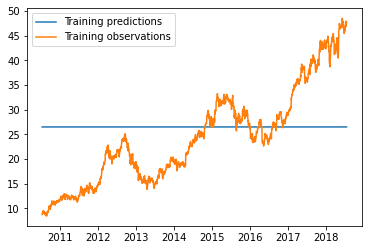

In [14]:
train_predictions = model_t.predict(X_train[0]).flatten()

plt.plot(dates_train[0], train_predictions)
plt.plot(dates_train[0], y_train[0])
plt.legend(['Training predictions', 'Training observations'])